# Differential Evolution

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
import random

In [2]:
class DifferentialEvolution():
    def __init__(self, dims, crossover_rate, differ_scale, num_individuals, num_gens):
        self.num_dims = dims
        self.crossover_rate = crossover_rate
        self.differ_scale = differ_scale
        self.num_individuals = num_individuals
        self.num_gens = num_gens
        
    def initialize_pop(self, lower_bound, upper_bound):
        population = []
        for index_indi in range(self.num_individuals):
            coefficents = np.random.random(self.num_dims)
            indi = []
            for coefficent in coefficents:
                indi.append(coefficent*(upper_bound - lower_bound) + lower_bound)
            indi = np.array(indi)
            population.append(indi)
        return np.array(population)
    
    def fitness_score(self, indi):
        indi_score = 0
        for dim in range(self.num_dims - 1):
            indi_score += 100*(indi[dim + 1] - indi[dim]**2)**2 + (indi[dim] - 1)**2
        return indi_score
    
    def mutate_crossover(self, pop, indi, lower_bound, upper_bound):
        indi_after = []
        index = np.random.choice(self.num_individuals, size = 3, replace = False)
        
        # new_indi after mutation
        new_indi = pop[index[0]] + self.differ_scale*(pop[index[1]] - pop[index[2]])
        
        # crossover
        index_mutate = np.random.randint(0, self.num_dims)
        for dim in range(self.num_dims):
            if random.random() < self.crossover_rate or dim == index_mutate:
                indi_after.append(new_indi[dim])
                if new_indi[dim] < lower_bound:
                    indi_after[dim] = lower_bound
                if new_indi[dim] > upper_bound:
                    indi_after[dim] = upper_bound
            else:
                indi_after.append(indi[dim])
        
        if self.fitness_score(indi_after) < self.fitness_score(indi):
            return np.array(indi_after)
        else:
            return indi
                
    def best_fitness_from(self, population):
        min_fitness = 100000000
        for indi in population:
            if self.fitness_score(indi) < min_fitness:
                min_fitness = self.fitness_score(indi)
                
        return min_fitness
    
    def fit_DE(self):
        population = self.initialize_pop(lower_bound = -5, upper_bound = 10)
        history_fitnesses, generation = [], 0
        while generation < self.num_gens:
            for index, indi in enumerate(population):
                indi_after = self.mutate_crossover(population, indi, -5, 10)
                population[index] = indi_after
            
            best_fitness = self.best_fitness_from(population)
            history_fitnesses.append(best_fitness)
            if generation % 50 == 0:
                print("Best fitness in generation {} is {}".format(generation + 1, best_fitness))
            generation += 1
        return history_fitnesses

In [5]:
model = DifferentialEvolution(dims = 20, 
                              crossover_rate = 0.6, 
                              differ_scale = 0.8, 
                              num_individuals = 200, 
                              num_gens = 1500)
history_fitnesses = model.fit_DE()

Best fitness in generation 1 is 214644.3218835448
Best fitness in generation 51 is 85733.49068436484
Best fitness in generation 101 is 27930.98228505177
Best fitness in generation 151 is 14208.885637683394
Best fitness in generation 201 is 4132.656964323906
Best fitness in generation 251 is 2723.4961635952677
Best fitness in generation 301 is 2048.005809298546
Best fitness in generation 351 is 2048.005809298546
Best fitness in generation 401 is 1194.0467422815943
Best fitness in generation 451 is 1043.4634460128862
Best fitness in generation 501 is 623.6289425185746
Best fitness in generation 551 is 546.7167514079337
Best fitness in generation 601 is 336.16717788991514
Best fitness in generation 651 is 304.331428187017
Best fitness in generation 701 is 257.49969933041814
Best fitness in generation 751 is 206.77949597917433
Best fitness in generation 801 is 161.8895728685656
Best fitness in generation 851 is 145.90467630211683
Best fitness in generation 901 is 110.42273794227155
Best fi

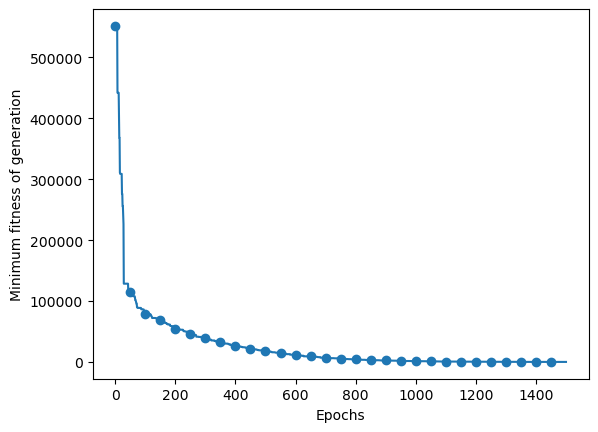

In [70]:
plt.plot(history_fitnesses)
plt.xlabel("Epochs")
plt.ylabel("Minimum fitness of generation")
epochs = [i for i in range(1500) if i % 50 == 0]
fitnesses = [history_fitnesses[i] for i in epochs]
plt.scatter(epochs, fitnesses)

# Real-Coded Genetic Algorithm

In [59]:
class Real_CodedGA():
    def __init__(self, dims, num_individuals, num_gens, distribution_index):
        self.num_dims = dims
        self.num_individuals = num_individuals
        self.num_gens = num_gens
        self.distribution_index = distribution_index
    
    def initialize_pop(self, lower_bound, upper_bound):
        population = []
        for index_indi in range(self.num_individuals):
            coefficents = np.random.random(self.num_dims)
            indi = []
            for coefficent in coefficents:
                indi.append(coefficent*(upper_bound - lower_bound) + lower_bound)
            indi = np.array(indi)
            population.append(indi)
        return population
    
    def fitness_score(self, indi):
        indi_score = 0
        for dim in range(self.num_dims - 1):
            indi_score += 100*(indi[dim + 1] - indi[dim]**2)**2 + (indi[dim] - 1)**2
        return indi_score
    
    # using SBX
    def crossover(self, fir_indi, sec_indi):
        param_beta, rand = None, random.random()
        if rand <= 0.5:
            param_beta = (2*rand)**(1./(self.distribution_index + 1))
        else:
            param_beta = (1./(2 - 2*rand))**(1./(self.distribution_index + 1))
            
        fir_offspring = 0.5*((1 + param_beta)*fir_indi + (1 - param_beta)*sec_indi)
        sec_offspring = 0.5*((1 - param_beta)*fir_indi + (1 + param_beta)*sec_indi)
        return fir_offspring, sec_offspring

    # using normally distributed mutation
    def mutate(self, indi, mutation_rate, mean, std_dev):
        for dim in range(self.num_dims):
            if random.random() < mutation_rate:
                mutation_value = np.random.normal(mean, std_dev)
                indi[dim] = indi[dim] + mutation_value
        return indi
    
    # using tournament selection
    def select(self, population, tour_size):
        tournament = []
        rand_indexes = np.random.choice(self.num_individuals, size = tour_size, replace = False)
        for index in rand_indexes:
            tournament.append(self.fitness_score(population[index]))
        chosen_index = np.argmax(tournament)
        return population[rand_indexes[chosen_index]]
    
    def best_fitness_from(self, population):
        min_fitness = 100000000
        for indi in population:
            if self.fitness_score(indi) < min_fitness:
                min_fitness = self.fitness_score(indi)
        return min_fitness
    
    def fit_RCGA(self, crossover_rate, mutate_rate):
        population = self.initialize_pop(lower_bound = -5, upper_bound = 10)
        generation, history_fitness = 0, []
        while generation < self.num_gens:
            pop_size = 0
            while pop_size < self.num_individuals:
                fir_offspring, sec_offspring = None, None
                fir_parent = self.select(population, tour_size = 20)
                sec_parent = self.select(population, tour_size = 20)
                
                if random.random() < crossover_rate:
                    fir_offspring, sec_offspring = self.crossover(fir_parent, sec_parent)
                    population.append(fir_offspring)
                    population.append(sec_offspring)
                    pop_size += 2
                
                if fir_offspring is not None and random.random() < mutate_rate:
                    offspring = self.mutate(fir_offspring, mutation_rate = 0.5, mean = 0, std_dev = 0.1)
                    population.append(offspring)
                    pop_size += 1
                    
            population.sort(key = lambda x: self.fitness_score(x))
            population = population[0: self.num_individuals]
            best_fitness = self.best_fitness_from(population)
            history_fitness.append(best_fitness)
            if generation % 50 == 0:
                print("Best fitness in generation {} is {}".format(generation + 1, best_fitness))
            generation += 1
        return history_fitness

In [63]:
model = Real_CodedGA(dims = 20,  
                     num_individuals = 200, 
                     num_gens = 1500,
                     distribution_index = 5)
history_fitness = model.fit_RCGA(crossover_rate = 0.8, mutate_rate = 0.5)

Best fitness in generation 1 is 583025.070418207
Best fitness in generation 51 is 166358.48776190504
Best fitness in generation 101 is 109630.6939967221
Best fitness in generation 151 is 81508.81326768071
Best fitness in generation 201 is 64228.04433723215
Best fitness in generation 251 is 50789.314665266436
Best fitness in generation 301 is 37173.776051788234
Best fitness in generation 351 is 29061.621664282815
Best fitness in generation 401 is 21468.689076220304
Best fitness in generation 451 is 14322.661084197884
Best fitness in generation 501 is 10726.227217880294
Best fitness in generation 551 is 8241.475765037218
Best fitness in generation 601 is 5390.450059500695
Best fitness in generation 651 is 3461.2370611307597
Best fitness in generation 701 is 2466.4149010450337
Best fitness in generation 751 is 1487.6260053296176
Best fitness in generation 801 is 980.0579918295599
Best fitness in generation 851 is 659.9334366197386
Best fitness in generation 901 is 392.36055367685316
Best 

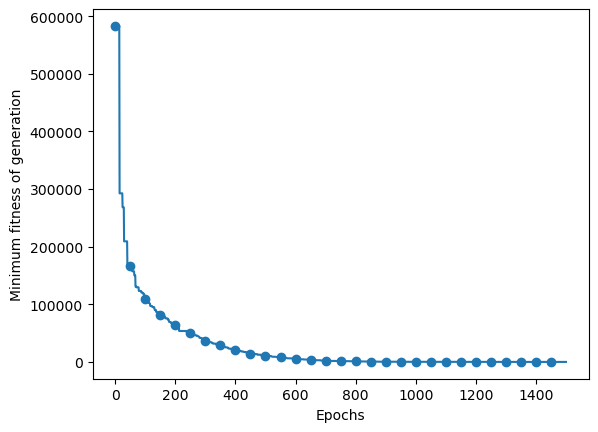

In [68]:
plt.plot(history_fitness)
plt.xlabel("Epochs")
plt.ylabel("Minimum fitness of generation")
epochs = [i for i in range(1500) if i % 50 == 0]
fitnesses = [history_fitness[i] for i in epochs]
plt.scatter(epochs, fitnesses)